# Bibliotecas

In [1]:
# Tratamento do DataFrame
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.manifold import MDS
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

# Outros
from utils.otimizar_clustering import numero_otimo_clusters

In [2]:
# Importando dataframe "cars", que foi construído com base na opinião de n = 150 consumidores 
# que agruparam 30 modelos de carros como similares/substituíveis na hora da compra, em que o valor
# 0 significa que todos os clientes colocaram dois modelos dentro de um mesmo grupo e 1 significa
# que todos alocaram os modelos em grupos diferentes.

df = pd.read_csv('cars.csv')
df.head()

,Unnamed: 0,UNO,KA,VECT,CELT1,GOL,GOLF,CORSS,GOL1,ECO,...,PALIO,DUBLO,PEUGEO,FIESTA,ASTRAH,CORSE,PALIOW,STILO,CELTA,CORHA
0,UNO,0.000000,0.388098,0.875486,0.462745,0.530719,0.737598,0.752618,0.437746,0.881890,...,0.836218,0.866131,0.700935,0.773585,0.819163,0.801619,0.814016,0.824798,0.510149,0.581867
1,KA,0.388098,0.000000,0.902216,0.382392,0.526938,0.729659,0.744737,0.440053,0.919525,...,0.854278,0.916667,0.672922,0.764865,0.822733,0.800543,0.844595,0.786198,0.449728,0.563094
2,VECT,0.875486,0.902216,0.000000,0.865789,0.828947,0.749344,0.563325,0.857520,0.899471,...,0.862115,0.888441,0.778523,0.568336,0.636856,0.548913,0.827680,0.648173,0.847619,0.826975
3,CELT1,0.462745,0.382392,0.865789,0.000000,0.436842,0.656992,0.714286,0.348745,0.895225,...,0.834677,0.901882,0.627027,0.737127,0.748641,0.779292,0.829468,0.741848,0.219945,0.460490
4,GOL,0.530719,0.526938,0.828947,0.436842,0.000000,0.565390,0.726552,0.278146,0.907285,...,0.800270,0.897849,0.619756,0.759511,0.719132,0.734057,0.777929,0.712925,0.419619,0.529332


In [3]:
# Substituindo o index pelos modelos dos carros:
cars = df.set_index('Unnamed: 0')

In [4]:
# Escalonamento multidimensional para reduzir os valores da matrix 30x30 para 2 dimensões:
escalonamento = MDS(n_components=2, dissimilarity = 'precomputed', metric = False)

In [5]:
escalonamento

MDS(dissimilarity='precomputed', metric=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
cars_transformado = escalonamento.fit_transform(cars)

# Clustering através do método Hierárquico

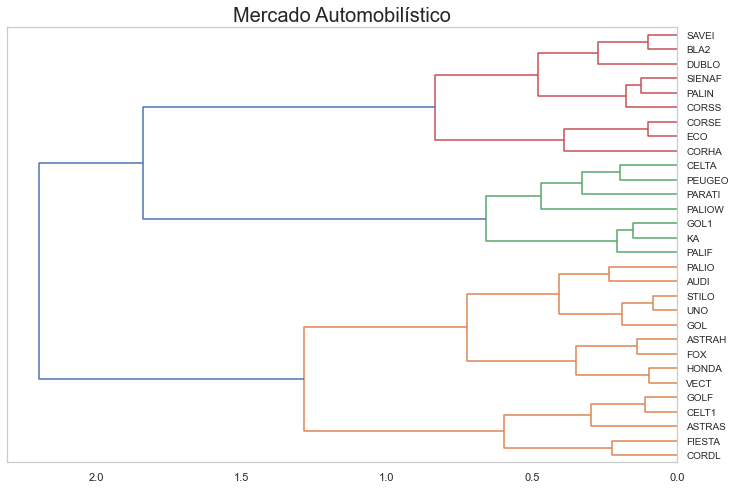

In [8]:
# Construindo clustering hierárquico a partir dos dados transformados.

plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style = 'whitegrid')

dendrograma = sch.dendrogram(sch.linkage(cars_transformado, method = 'ward'), labels=cars.index,
                            orientation='left')

plt.title('Mercado Automobilístico', fontsize = 20)
plt.grid(False)
plt.show()

# Clustering através do método k-Means

In [9]:
# Como exercício e para comparação com o clustering hierárquico também vou segmentar
# os clientes por k-Means, tomando como base o notebook customers_clustering.ipynb
# que desenvolvi anteriormente.

In [10]:
df_cars = pd.DataFrame(cars_transformado)

In [11]:
wcss = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cars)
    wcss.append(kmeans.inertia_)

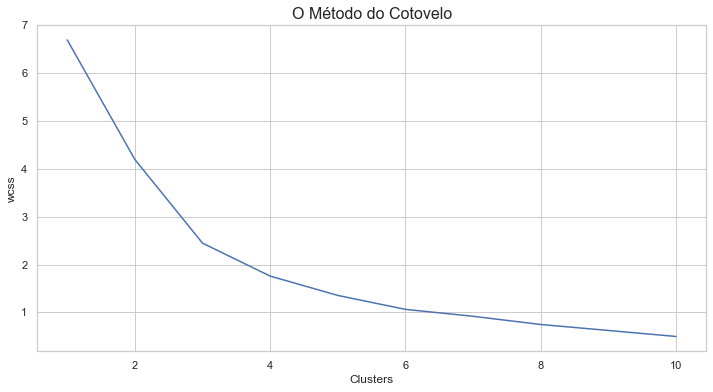

In [12]:
plt.rcParams['figure.figsize'] = (12, 6)

plt.plot(range(1, 11), wcss)
plt.title('O Método do Cotovelo', fontsize = 16)
plt.xlabel('Clusters')
plt.ylabel('wcss')
plt.show();

In [13]:
# Assim como no notebook customers_clustering.ipynb, posso utilizar a função numero_otimo_clusters()
# para encontrar a quantidade ideal de clusters. Para fazer isso, criei uma pasta chamada "utils"
# e dentro dela inseri um arquivo .py com a função numero_otimo_clusters() e outro arquivo em branco
# denominado __init__.py, desta forma posso importar o módulo para este notebook.

In [14]:
n = numero_otimo_clusters(wcss)
print('O número ótimo de clusters é: ', n)

O número ótimo de clusters é:  6


In [15]:
km = KMeans(n_clusters = n)
ymeans = km.fit_predict(df_cars)
labels = km.labels_

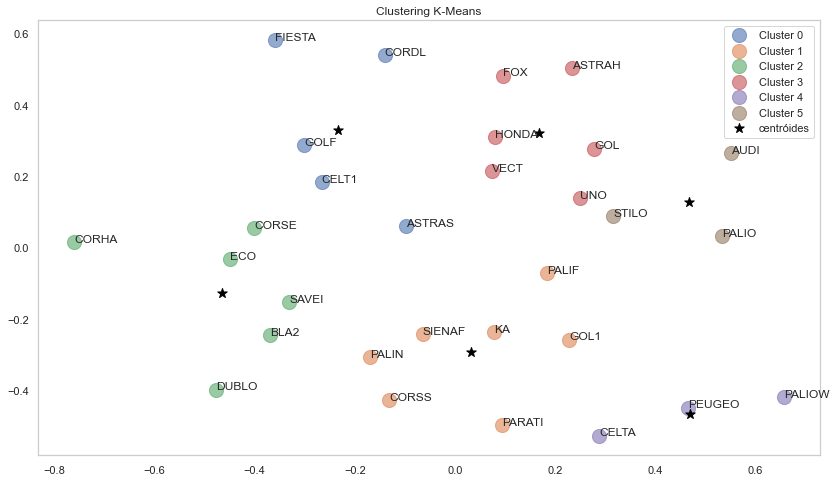

In [19]:
labels = cars.index

figura = plt.figure(figsize=(14, 8))

for i in range(n):
    plt.scatter(cars_transformado[ymeans == i, 0], cars_transformado[ymeans == i, 1], s = 200, 
                alpha=0.6, label = 'Cluster ' + str(i))
    
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, 
            c = 'black', label = 'centróides', marker='*')

for i, txt in enumerate(labels):
    plt.annotate(txt, (df_cars[0][i], df_cars[1][i]), fontsize= 12)

plt.title('Clustering K-Means')
plt.legend()
plt.grid(False)

figura.show()